In [1]:
import cv2
import numpy as np

# 读取图像
image = cv2.imread('star.jpg')

# 转换为灰度图像
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 进行边缘检测
edges = cv2.Canny(gray, 50, 150)

# 查找轮廓
# contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 创建一个空白画布，用于绘制路径规划结果
canvas = np.zeros_like(image)

# 遍历每个轮廓
# for contour in contours:
#     # 对轮廓进行适当的处理和近似，以减少点的数量
#     epsilon = 0.02 * cv2.arcLength(contour, True)
#     approx = cv2.approxPolyDP(contour, epsilon, True)

#     # 绘制轮廓
#     cv2.drawContours(canvas, [approx], -1, (0, 255, 0), 2)
for i, contour in enumerate(contours):
    # 检查轮廓的层级关系，如果不是最外层轮廓，则认为是内部轮廓
    if hierarchy[0][i][3] != -1:
        cv2.drawContours(canvas, [contour], -1, (0, 255, 0), 2)

# 显示轮廓提取结果
cv2.imshow('Contours', canvas)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import win32com.client

# 创建SolidWorks应用程序实例
swApp = win32com.client.Dispatch('SldWorks.Application')

# 打开零件文件
partDoc = swApp.OpenDoc("path_to_your_part_file", 1)  # 替换为零件文件的路径

# 获取零件模型
part = partDoc.GetPart()

# 创建选择工具
selMgr = partDoc.SelectionManager

# 创建一个选择集
sel = selMgr.CreateSelectSet()

# 设置选择集的选择条件为点
sel.Select2(True, 0)

# 设置选择集的点坐标
x = 10  # 替换为您想要查询的点的X坐标
y = 20  # 替换为您想要查询的点的Y坐标
z = 0  # 可以设置为任意值，因为只需要获取高度

# 创建一个点对象
point = swApp.GetMathUtility().CreatePoint([x, y, z])

# 将点添加到选择集中
sel.AddSelectionListObject(point, 0)

# 获取选择集的高度
height = partDoc.Extension.GetClosestPointOn(sel).Point(2)

# 关闭零件文档
partDoc.Close()

# 关闭SolidWorks应用程序
swApp.ExitApp()

# 输出高度值
print("Height at point ({}, {}): {}".format(x, y, height))


In [3]:
import cv2
import numpy as np

# 读取图像
image = cv2.imread('heart.png')

# 转换为灰度图像
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 二值化处理
_, binary = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

# 轮廓检测
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 提取轮廓的坐标
contour_points = []
for contour in contours:
    for point in contour:
        x, y = point[0]
        contour_points.append((x, y))

# 打印轮廓的坐标
for point in contour_points:
    print("坐标：", point)

# 在原图上绘制轮廓
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

# 显示结果
cv2.imshow("Result", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


坐标： (0, 0)
坐标： (0, 581)
坐标： (963, 581)
坐标： (963, 0)


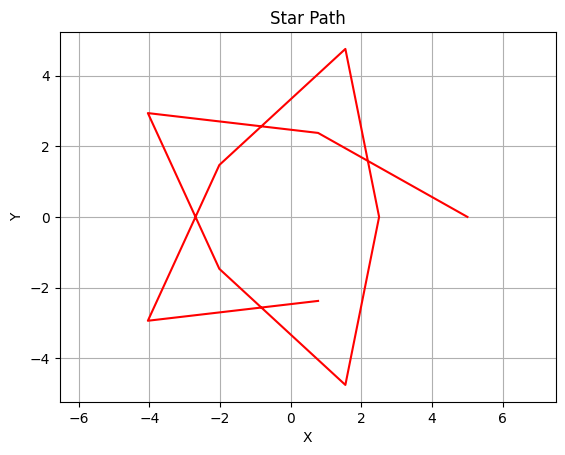

In [5]:
import math
import matplotlib.pyplot as plt

def generate_star_path(center_x, center_y, radius):
    num_points = 5  # 五角星有五个顶点

    angle = 2 * math.pi / num_points  # 每个顶点之间的夹角

    path = []  # 用于存储路径坐标的列表

    # 计算五角星的路径坐标
    for i in range(num_points * 2):
        if i % 2 == 0:
            # 计算顶点坐标
            x = center_x + math.cos(i * angle) * radius
            y = center_y + math.sin(i * angle) * radius
        else:
            # 计算顶点内部的坐标（用于连接顶点）
            x = center_x + math.cos(i * angle) * radius * 0.5
            y = center_y + math.sin(i * angle) * radius * 0.5

        path.append((x, y))  # 将坐标添加到路径列表中

    return path

# 测试代码
center_x = 0
center_y = 0
radius = 5

star_path = generate_star_path(center_x, center_y, radius)

# 提取路径坐标
x_coords = [point[0] for point in star_path]
y_coords = [point[1] for point in star_path]

# 绘制五角星图形
plt.plot(x_coords, y_coords, 'r-')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Star Path')
plt.axis('equal')  # 设置坐标轴比例相等，以保持图形形状正确
plt.grid(True)
plt.show()


In [8]:
a=np.array([21.09,7.92,22.07,3.83,23.77,7.63,19.98,5.59,24.32,5.11])
print(a*500/30.8)


[342.37012987 128.57142857 358.27922078  62.17532468 385.87662338
 123.86363636 324.35064935  90.74675325 394.80519481  82.95454545]


In [3]:
import numpy as np
import cv2
import camera

def segment(img):
    # lower=np.array([0, 190, 190, 0])
    # upper=np.array([140, 255, 255, 255])
    width=img.shape[1]
    height=img.shape[0]
    lower=np.dot(np.ones([height,width,1]), np.array([[0, 190, 190]])).astype(np.uint8)
    upper=np.dot(np.ones([height,width,1]), np.array([[140, 255, 255]])).astype(np.uint8) #lower and upper bound for BGR yellow segmentation.
    # print(img.shape)
    # print(lower.shape)
    return cv2.inRange(img,lower,upper) #需要lower、upper和imgsize相同


# 原始坐标点
points = np.array([19.09, 7.92, 20.07, 3.83, 21.77, 7.63, 17.98, 5.59, 22.32, 5.11])
points = points*500/30.8
points = points.reshape((-1, 2))  # 将一维数组转换为二维坐标点
# print(points)
# points[0,:]=points[0,:]-10
# 插值点数
desired_points = 40

# 插值点生成
interpolated_points = []
for i in range(len(points)):
    start_point = points[i]
    end_point = points[(i + 1) % len(points)]  # 最后一个点和第一个点相连
    diff = end_point - start_point
    step = diff / (desired_points + 1)  # 插值步长
    for j in range(desired_points):
        interpolated_point = start_point + step * (j + 1)
        interpolated_points.append(interpolated_point)

# 将原始坐标点和插值点合并
all_points = np.vstack((points, interpolated_points))

# 读取图片
camera=camera.Camera()
srcImg=camera.get_last_rbg()
x1,x2,y1,y2=400,900,440,650     # ROI范围
# image=srcImg[y1:y2+1,x1:x2+1,:]
image=cv2.imread('catch.jpg')
roiImg=np.array(image)

# 绘制路径
for i in range(len(all_points) - 1):
    start = tuple(all_points[i].astype(int))
    end = tuple(all_points[i + 1].astype(int))
    cv2.line(image, start, end, (0, 0, 255), 2)  # 红色线条

cv2.imshow('image',image)
# 绘制最后一个点和第一个点的连线
start = tuple(all_points[-1].astype(int))
end = tuple(all_points[0].astype(int))
cv2.line(image, start, end, (0, 0, 255), 2)  # 红色线条

#####提取坐标原点=====================================================

# roiImg=cv2.resize(roiImg, (500, 210))
roiImg_copy=np.array(roiImg)

roiImg=segment(roiImg)
# cv2.imshow('roiImg',roiImg)

# 查找轮廓
contours, hierarchy = cv2.findContours(roiImg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(contours)
# 找到最左下角的点（作为物体坐标系原点）
min_x =800
max_y = 0
for contour in contours:
    for point in contour:
        x, y = point[0]
        if x < min_x:
            min_x = x
        if y > max_y:
            max_y = y

# 在最左下角的点上绘制一个圆
cv2.circle(roiImg_copy, (min_x, max_y), 5, (0, 0, 255), -1)  # 在最右下角点绘制一个半径为5的红色实心圆
# 显示图像
cv2.imshow("Contour Image", roiImg_copy)
cv2.waitKey(0)

# Subtracting coordinates and storing in a new array
relative_coords = all_points - np.array([min_x, max_y])

# Saving the array to a file
np.savetxt('relative_star.txt', relative_coords)
# # 显示绘制结果
cv2.imshow('Result', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

'''TODO:读取方法
import numpy as np

# Loading the relative coordinates from the file
relative_coords = np.loadtxt('relative_coords.txt')

# Accessing the coordinates
x_coords = relative_coords[:, 0]  # First column (x-coordinates)
y_coords = relative_coords[:, 1]  # Second column (y-coordinates)

# Example usage: Print the coordinates
for x, y in zip(x_coords, y_coords):
    print(f'Relative coordinates: ({x}, {y})')

'''


KeyboardInterrupt: 

In [18]:
import numpy as np
contour3d = np.loadtxt('contour3d.txt')
print("数组形状:", contour3d.shape)
print("数组类型:", contour3d.dtype)
# def sample_on_contour(contour, point_num):
#     contour_length = contour.shape[1]
#     if contour_length>=point_num:
#         return contour.copy()
#     step = contour_length // point_num
#     sampled_contour = contour[:, ::step]
    
#     # 如果最后一个点不在采样点中，添加最后一个点到采样点中
#     if sampled_contour.shape[1] < point_num:
#         sampled_contour = np.concatenate((sampled_contour, contour[:, -1].reshape(-1, 1)), axis=1)
    
#     return sampled_contour
def sample_on_contour(contour, point_num):
    contour_length = contour.shape[1]
    step = max(contour_length // point_num, 1)  # 至少取一个点
    
    sampled_contour = contour[:, ::step]
    
    # 如果最后一个点不在采样点中，添加最后一个点到采样点中
    if sampled_contour.shape[1] < point_num:
        sampled_contour = np.concatenate((sampled_contour, contour[:, -1].reshape(-1, 1)), axis=1)
    
    # 线性插值填充缺失的采样点
    if sampled_contour.shape[1] < point_num:
        missing_points = point_num - sampled_contour.shape[1]
        step_size = contour_length / (point_num - 1)
        
        for i in range(missing_points):
            index = int(i * step_size)
            interpolated_point = contour[:, index].reshape(-1, 1)
            sampled_contour = np.insert(sampled_contour, i+1, interpolated_point, axis=1)
    
    return sampled_contour

point_num=30
points_s=sample_on_contour(contour3d,point_num) 
print(points_s.shape)
print(points_s)


数组形状: (3, 52)
数组类型: float64
(3, 52)
[[-53.79223751 -53.18096208 -53.18096208 -52.56968666 -52.56968666
  -51.95841123 -51.95841123 -51.34713581 -51.34713581 -50.73586038
  -50.73586038 -49.51330953 -47.06820782 -46.4569324  -44.01183069
  -43.40055526 -31.78632217 -31.17504674 -28.72994503 -28.11866961
  -13.44805938 -12.83678395 -11.00295767 -10.39168225 -10.39168225
  -11.00295767 -11.00295767 -11.6142331  -11.6142331  -12.22550853
  -12.22550853 -12.83678395 -12.83678395 -13.44805938 -13.44805938
  -14.0593348  -16.50443651 -17.11571194 -18.94953821 -19.56081364
  -22.61719077 -23.2284662  -28.11866961 -28.72994503 -29.95249589
  -30.56377131 -41.56672899 -42.17800441 -50.12458495 -50.73586038
  -53.18096208 -53.79223751]
 [ 64.18924347  63.57791734  49.51741639  48.90609026  40.9588506
   40.34752447  17.72845772  17.11713159  14.06050095  13.44917482
   12.22652257  11.00387031  11.00387031  10.39254418  10.39254418
   11.00387031  11.00387031  11.61519644  11.61519644  12.2265225

In [1]:
import numpy as np
contour3d = np.loadtxt('relative_star.txt')
print("数组形状:", contour3d.shape)
print("数组类型:", contour3d.dtype)

数组形状: (205, 2)
数组类型: float64


In [21]:
rx=np.pi-0.01
# # 将欧拉角转换为旋转矩阵R
R_x = np.array([[1, 0, 0],
                [0, np.cos(rx), -np.sin(rx)],
                [0, np.sin(rx), np.cos(rx)]])
R_y=np.array([[1.0,0.0,0.0],
            [0.0,1.0,0.0],
            [0.0,0.0,1.0]])
R_z=np.array([[0.0,-1.0,0.0],
            [1.0,0.0,0.0],
            [0.0,0.0,1.0]])

R = R_z.dot(R_y).dot(R_x)
print(R)
(pen_x,pen_y,pen_z)=200,270,300
R_inv=np.linalg.inv(R)
pen_pos=np.array([0,-60,75])#笔末端在机械臂末端的坐标
end_position=np.array([pen_x,pen_y,pen_z])-np.dot(R_inv,pen_pos)


[[ 0.          0.99995     0.00999983]
 [ 1.          0.          0.        ]
 [ 0.          0.00999983 -0.99995   ]]
[260.         269.2500125  174.99625003]


In [39]:
import camera
camera=camera.Camera()
srcImg=camera.get_last_rbg()
x1,x2,y1,y2=400,900,440,650     #ROI范围
image=srcImg[y1:y2+1,x1:x2+1,:]
cv2.imwrite('catch.jpg',image)

get rgb frame!


True